##  Posttest 4 — Supervised Learning (Regresi)
**Nama Database:** SuperStoreOrders  
**Target Label:** `Sales`  
**Jenis Model:** Linear Regression (Regresi)


##  1. Import Library


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Load Data Set

In [9]:
df = pd.read_csv("SuperStoreOrders.csv")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


## 3. Data Cleaning

In [10]:
df.info()
df.isnull().sum()

df.drop_duplicates(inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

## 4. Pilih Fitur & Target

In [11]:
#kolom numerik diubah ke float
df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)
df['profit']   = df['profit'].astype(str).str.replace(',', '').astype(float)
df['sales']    = df['sales'].astype(str).str.replace(',', '').astype(float)
X = df[['quantity', 'profit']]  # dua fitur numerik
y = df['sales']  # target numerik

## 5. Splitting Data (Training & Testing)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model 1 — Linear Regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

## Evaluasi Moddel 1 — Linear Regression

In [15]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("📏 Evaluasi Support Vector Regressor:")
print(f"MAE  : {mae_svr:.3f}")
print(f"MSE  : {mse_svr:.3f}")
print(f"RMSE : {rmse_svr:.3f}")
print(f"R2   : {r2_svr:.3f}")

📏 Evaluasi Support Vector Regressor:
MAE  : 133.512
MSE  : 157599.397
RMSE : 396.988
R2   : 0.356


## 7. Model 2 — Support Vector Regressor (SVR)

In [14]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

## Evaluasi Model 2 — Support Vector Regressor (SVR)

In [16]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("📏 Evaluasi Support Vector Regressor:")
print(f"MAE  : {mae_svr:.3f}")
print(f"MSE  : {mse_svr:.3f}")
print(f"RMSE : {rmse_svr:.3f}")
print(f"R2   : {r2_svr:.3f}")

📏 Evaluasi Support Vector Regressor:
MAE  : 133.512
MSE  : 157599.397
RMSE : 396.988
R2   : 0.356


## 8. Visualisasi Hasil Prediksi

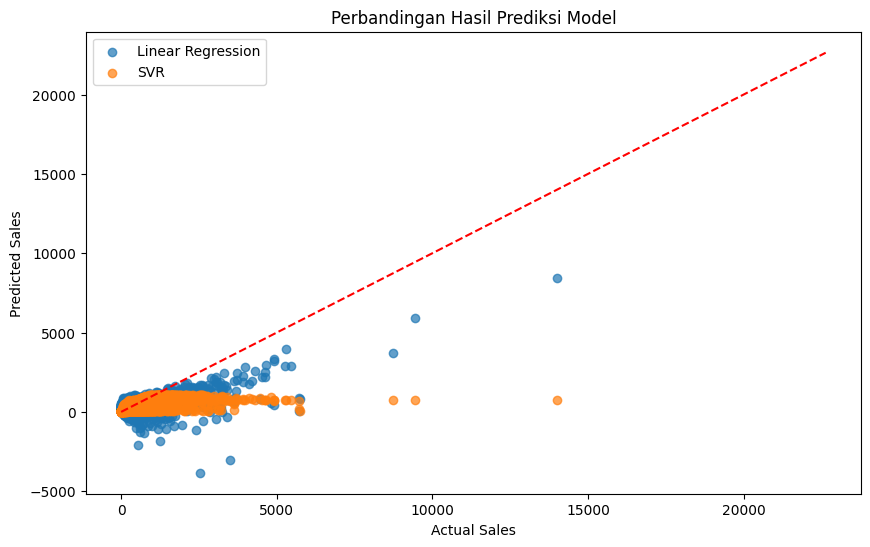

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_svr, label='SVR', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Perbandingan Hasil Prediksi Model")
plt.legend()
plt.show()